In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,NearestNeighbors
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier,BaggingClassifier,BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler,Normalizer,MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Activation,Dropout,Flatten


In [2]:
data=pd.read_csv("../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(372450, 785)

In [4]:
data.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [5]:
import warnings

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


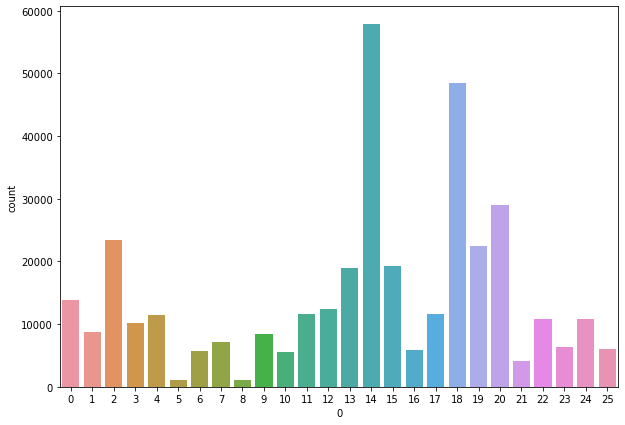

In [6]:
plt.figure(figsize=[10,7])
sn.countplot(data["0"])
plt.show()

In [7]:
import math
math.sqrt(785)

28.0178514522438

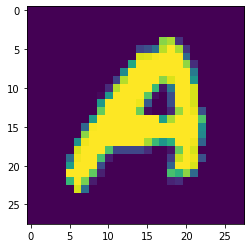

In [8]:
a=data.iloc[11000,1:].values
a=a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [9]:
data=data.rename(columns={"0":"Target"})
data.head()

,Target,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data["Target"].value_counts().sort_index()

0     13869
1      8668
2     23409
3     10134
4     11440
5      1163
6      5762
7      7218
8      1120
9      8493
10     5603
11    11586
12    12336
13    19010
14    57825
15    19341
16     5812
17    11566
18    48419
19    22495
20    29008
21     4182
22    10784
23     6272
24    10859
25     6076
Name: Target, dtype: int64

In [11]:
x=data.drop(["Target"],1)
y=data.iloc[:,0]
y

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: Target, Length: 372450, dtype: int64

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [13]:
from keras.utils import to_categorical
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [14]:
model=Sequential()
model.add(Dense(256,input_dim=784,activation='sigmoid'))
model.add(Dense(132,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(26,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.fit(x_train,Y_train,epochs=20,verbose=1)

Epoch 1/20
8148/8148 [==============================] - 32s 4ms/step - loss: 0.9039 - accuracy: 0.7399
Epoch 2/20
8148/8148 [==============================] - 31s 4ms/step - loss: 0.4458 - accuracy: 0.8659
Epoch 3/20
8148/8148 [==============================] - 32s 4ms/step - loss: 0.3524 - accuracy: 0.8939
Epoch 4/20
8148/8148 [==============================] - 32s 4ms/step - loss: 0.3102 - accuracy: 0.9052
Epoch 5/20
8148/8148 [==============================] - 32s 4ms/step - loss: 0.2810 - accuracy: 0.9147
Epoch 6/20
8148/8148 [==============================] - 32s 4ms/step - loss: 0.2769 - accuracy: 0.9163
Epoch 7/20
8148/8148 [==============================] - 32s 4ms/step - loss: 0.2587 - accuracy: 0.9212
Epoch 8/20
8148/8148 [==============================] - 32s 4ms/step - loss: 0.2492 - accuracy: 0.9251
Epoch 9/20
8148/8148 [==============================] - 32s 4ms/step - loss: 0.2367 - accuracy: 0.9288
Epoch 10/20
8148/8148 [==============================] - 32s 4ms/step - l

In [16]:
model.evaluate(x_test,Y_test)

3492/3492 [==============================] - 8s 2ms/step - loss: 0.1942 - accuracy: 0.9417


[0.1941506564617157, 0.9417461156845093]

In [19]:
pred=model.predict_classes(x_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


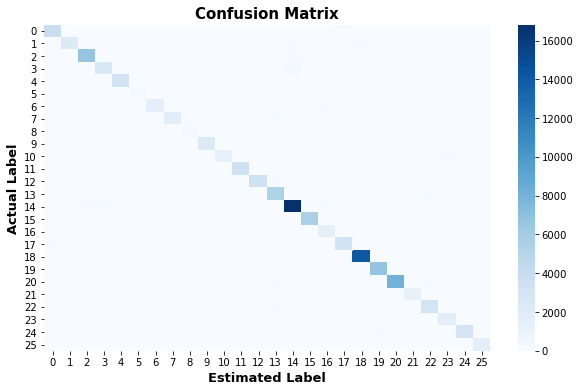

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
plt.figure(figsize=[10,6])
plt.title("Confusion Matrix",fontdict={"weight":"bold","size":15})
sn.heatmap(confusion_matrix(y_test,pred,),cmap=plt.cm.Blues)
plt.ylabel("Actual Label",fontdict={"weight":"bold","size":13},color="Black")
plt.xlabel("Estimated Label",fontdict={"weight":"bold","size":13},color="Black")
plt.show()

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4139
           1       0.92      0.84      0.88      2679
           2       0.96      0.95      0.96      6975
           3       0.89      0.81      0.85      3108
           4       0.92      0.90      0.91      3440
           5       0.91      0.91      0.91       351
           6       0.91      0.87      0.89      1749
           7       0.88      0.86      0.87      2191
           8       0.90      0.84      0.87       301
           9       0.91      0.90      0.90      2504
          10       0.93      0.81      0.87      1603
          11       0.95      0.98      0.96      3569
          12       0.96      0.95      0.95      3662
          13       0.89      0.94      0.92      5696
          14       0.95      0.97      0.96     17351
          15       0.97      0.97      0.97      5832
          16       0.81      0.91      0.85      1695
          17       0.90    